<a href="https://colab.research.google.com/github/Jayaramgokul/NLP-Projects/blob/main/jg929_zz274_CS_4740_FA21_p2_release_SecAtt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Named Entity Recognition (NER) with Sequence Labeling Models
## CS4740/5740 Fall 2021

### Project Submission Due: Oct 15th, 2021 (11.59PM)
Please submit **pdf file** of this notebook on **Gradescope**, and **ipynb** on **CMS**. For instructions on generating pdf and ipynb files, please refer to project 1 instructions.



**Names:** Jayaram Gokulan, Zhou Zhou

**Netids:** jg929, zz274

Don't forget to share your newly copied notebook with your partner!


**Reminder: both of you can't work in this notebook at the same time from different computers/browser windows because of sync issues. We even suggest to close the tab with this notebook when you are not working on it so your partner doesn't get sync issues.**


# **Introduction** 🔎

---

In this project, you will implement a model that identifies named entities in text and tags them with the appropriate label. Particularly, the task of this project is **Named Entity Recognition**. A primer on this task is provided further on. The given dataset is a modified version of the CoNLL-2003 ([Sang et al](https://arxiv.org/pdf/cs/0306050v1.pdf)) dataset. Please use the datasets that we have released to you instead of versions found online as we have made simplifications to the dataset for your benefit. Your task is to develop NLP models to identify these named entities automatically. We will treat this as a **sequence-tagging task**: for each token in the input text, assign one of the following 5 labels: **ORG** (Organization), **PER** (Person), **LOC** (Location), **MISC** (Miscellaneous), and **O** (Not Named Entity). More information about the dataset is provided later

For this project, you will implement two sequence labeling approaches:
- Model 1 : a Hidden Markov Model (HMM)
- Model 2 : a Maximum Entropy Markov Model (MEMM), which is an adaptation of an HMM in which a Logistic Regression classifier (also known as a MaxEnt classifier) is used to obtain the lexical generation probabilities (i.e., the observation/emission probability matrix, so "observations" == "emissions" == "lexical generations"). Feature engineering is strongly suggested for this model!

Implementation of the Viterbi algorithm (for finding the most likely tag sequence to assign to an input text) is required for both models above, so make sure that you understand it ASAP.

You will implement and train two sequence tagging models, generate your predictions for the provided test set, and submit them to **Kaggle**. Please enter all code in this colab notebook and answer all the questions in the supporting document.

To refresh your memory on HMMs, MEMMs, and Viterbi you can refer to **Jurafsky & Martin Ch. 8.3–8.5** and the lecture slides which can be found on EdStem.

## **Logistics**

---

- You **must** work in **groups of 2 students**. Students in the same group will get the same grade. Thus, you should make sure that everyone in your group contributes to the project. 
- **Remember to form groups on BOTH CMS and Gradescope** or not all group members will receive grades. You can use make a post on EdStem to find a partner for this project.
- Please complete the written questions of this notebook in a clear and informative way. We have created a template document for you to answer the written questions. This document can be found [here](https://docs.google.com/document/d/1vnxYFS-rxxLOYfKG6YN35YktJZnzqQBhE1Mj1Xu7IF0/edit?usp=sharing). Please make a copy of this document for yourself and add your names and netids in the header and answer the written questions on it. You will need to submit this document to gradescope as well (do not forget to do this please!).
- At the end: please make sure to submit the following 3 items:
  1. PDF version of Colab notebook on Gradescope (instructions for converting to PDF are at the end).
  2. PDF version of Google Doc with written answers to the numbered questions on this colab on Gradescope.
  3. .ipynb version of your colab notebook on CMS.

- Note: When submitting the PDF documents to Gradescope (colab notebook & writeup doc) please join/concatenate the PDFs and then submit them as one. You may do this any way you please. You can use [this](https://pdfjoiner.com/) website if you wish to.

## **Advice**

---

1. Please read through the entire notebook before you start coding. That might inform your code structure.
2. Grading breakdown is found at the end; please consult it.
3. Google colab does **not** provide good synchronization; we do not recommend multiple people to work on the same notebook at the same time.
4. The project is somewhat open ended. ("But that's a good thing.  Really. It's more fun that way", says Claire.) We will ask you to implement some model, but precise data structures and so on can be chosen by you. However, to integrate with Kaggle, you will need to submit Kaggle predictions using the given evaluation code (more instructions later).
5. You will be asked to fill in your code at various points of the document. You will also be asked to answer questions that analyze your results and motivate your implementation. Please answer these on an additional writeup document. A template has been provided to you.

## **Named Entity Recognition: A Primer**

---

Let us now take a look at the task at hand: Named Entity Recognition (NER). This section provides a brief introduction to the task and why it is important.

**What is NER?**
NER refers to the information extraction technique of identifying and categorizing key information about entities within textual data. Let's look at an example: 

<br/>

![picture](https://drive.google.com/uc?id=1mxwn1_2Ef16_MJeyl9jJwwR6IohUOeHO)

<br/>

In the above example, we can see that the text has numerous named entities that can be categorized as LOC (location), ORG (organization), PER (person), etc. Today, the task of NER has been overwhelmed by deep learning approaches. However, for this assignment, we will try to do NER using something simpler: HMMs and MEMMs. NER is important for a number of reasons and has a wide variety of use cases such as but not limited to:
  - Detect entities in search engines and voice assistants for more relavent search results.
  - Automatically parsing resumes.
  - ...and many more!


To read more on NER, we refer to any of the following sources:
1. Medium post [1](https://umagunturi789.medium.com/everything-you-need-to-know-about-named-entity-recognition-2a136f38c08f) and [2](https://medium.com/mysuperai/what-is-named-entity-recognition-ner-and-how-can-i-use-it-2b68cf6f545d).
2. Try out [this](https://demo.allennlp.org/named-entity-recognition/named-entity-recognition) AlllenNLP demo!

## **Entity Level Mean F1**

---

Let's take a look at the metrics that you will focus on in this assignment. The standard measures to report for NER are recall, precision, and F1 score
(also called F-measure) evaluated at the **named entity level** (not at the token level). The code for this has been provided later under the validation section under Part 2. Please use this code when evaluating your models. 


If P and T are the sets of predicted and true *named entity spans*, respectively, (e.g, the five named entity spans in the above example are "Zifa", "Renate Goetschl", "Austria", "World Cup", and "Germany") then

####<center>Precision = $\frac{|\text{P}\;\cap\;\text{T}|}{|\text{P}|}$ and Recall = $\frac{|\text{P}\;\cap\;\text{T}|}{|\text{T}|}$.</center><br/>


####<center>F1 = $\frac{2 * \text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$. </center><br/>

For each type of named entity, e.g. *LOC*ation, *MISC*ellaneous, *ORG*anization and *PER*son, we calculate the F1 score as shown above, and take the mean of all these F1 scores to get the **Entity Level Mean F1** score for the test set. If $N$ is the total number of labels (i.e., named entity types), then

####<center>Entity Level Mean F1 = $\frac{\sum_{i = 1}^{N} \text{F1}_{{label}_i}}{N}$. </center>

More details under the validation section in Part 2.



# **Part 1: Dataset** 📈

Load the dataset as follows:
  1. Obtain the data from Kaggle at https://www.kaggle.com/c/cs4740-fa21-p2/data.
  2. Unzip the data. Put it into your google drive, and mount it on colab as per below:

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# TODO: please change the line below with your drive organization
path = os.path.join(os.getcwd(), "drive", "My Drive/NLP Project_2") 

with open(os.path.join(path,'train.json'), 'r') as f:
     train = json.loads(f.read())

with open(os.path.join(path,'test.json'), 'r') as f:
     test = json.loads(f.read())


In [ ]:
def list_0fList_count(list_of_list):
  flat_list = [item for sublist in list_of_list for item in sublist]                 
  return flat_list,set(flat_list)

Here's a few things to note about the dataset above:
1. We have just loaded 2 json files: train and test. Please note that these files are different from the original release of the CoNNL-2003 since we have already processed and tokenized them for you. Hence, the documents are represented as a list of strings. Note that it is **not** split into separate training and development/validation sets. You will need to do this yourself as needed using the train set.
2. The train file contains the following 4 fields (each is a nested list): 
  - **'text'** - actual input tokens
  - **'NER'** - the token-level entity tag (ORG/PER/LOC/MISC/O) where **O is used to denote tokens that are not part of any named entity**
  - **'POS'** - the part of speech tag (will be handy for feature engineering of the MEMM model)
  - **'index'** - index of the token in the dataset
3. The test data only has 'text', 'POS' and 'index' fields. You will need to submit your prediction of the 'NER' tag to Kaggle. More instructions on this later!

Let's take a look at a sample sentence from the dataset!

In [ ]:
print(train['text'])


[['Romania', 'state', 'budget', 'soars', 'in', 'June', '.', 'BUCHAREST', '1996-08-28', 'Romania', "'s", 'state', 'budget', 'deficit', 'jumped', 'sharply', 'in', 'June', 'to', '1,242.9', 'billion', 'lei', 'for', 'the', 'January-June', 'period', 'from', '596.5', 'billion', 'lei', 'in', 'January-May', ',', 'official', 'data', 'showed', 'on', 'Wednesday', '.', 'Six-month', 'expenditures', 'stood', 'at', '9.50', 'trillion', 'lei', ',', 'up', 'from', '7.56', 'trillion', 'lei', 'at', 'end-May', ',', 'with', 'education', 'and', 'health', 'spending', 'accounting', 'for', '31.6', 'percent', 'of', 'state', 'expenses', 'and', 'economic', 'subsidies', 'and', 'support', 'taking', 'some', '26', 'percent', '.', 'January-June', 'revenues', 'went', 'up', 'to', '8.26', 'trillion', 'lei', 'from', '6.96', 'trillion', 'lei', 'in', 'the', 'first', 'five', 'months', 'this', 'year', '.', 'Romania', "'s", 'government', 'is', 'expected', 'to', 'revise', 'the', '1996', 'budget', 'on', 'Wednesday', 'to', 'bring', 

As you can see, the above the sentence, "Romania state budget soars in June.", has already been tokenized into an array of word tokens. The index array corresponds to the index of the token in the entire dataset (not the sentence). The POS tags and the NER tags correspond to the given indices. For example, the token: **Romania** has:
  - index: 0
  - POS: 'NNP'
  - NER: **'ORG'**

### **Q1: Initial Data Observations**
What are your initial observations after you explore the dataset?  Provide some quantitative data exploration. Assess dataset size, document lengths and the token-level NER class distribution, and the entity-level NER class distribution (skipping the 'O' label for the latter). Give some examples of sentences with their named entities bracketed, e.g. [[LOC Romania] state budget soars in June .] and [[ORG Zifa] said [PER Renate Goetschl] of [LOC Austria]...]. 

Present your findings in the supporting template document!

In [ ]:
# Total No of words in Training Data

def list_0fList_count(list_of_list):
  flat_list = [item for sublist in list_of_list for item in sublist]                 
  return flat_list,set(flat_list)

Total_words_training = len(list_0fList_count(X_valid["text"])[0])
print("The Total No of Words in Training Data is ", Total_words_training)

The Total No of Words in Training Data is  17459


In [ ]:
# Total No of Unique words in Training Data

Total_words_training = len(list_0fList_count(train["text"])[1])
print("The Total No of Unique Words in Training Data is ", Total_words_training)

The Total No of Unique Words in Training Data is  20767


### Number of words in sentences - Training Data

262


<BarContainer object of 756 artists>

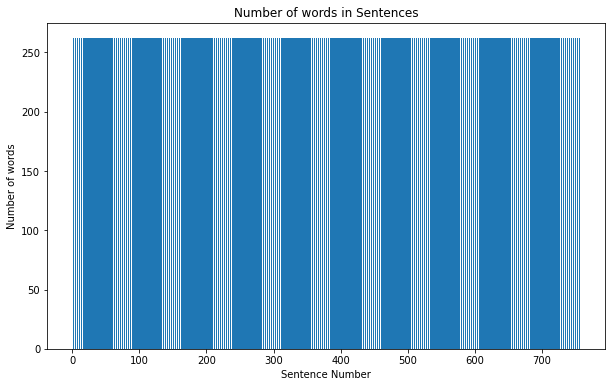

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
seq=[]
count = 0
for x in train["text"]:
  count+=1
  seq.append(count)
  leng=len(x)
keys = seq
values = leng
plt.title("Number of words in Sentences")
ax.set_xlabel("Sentence Number")
ax.set_ylabel("Number of words")
print(leng)
plt.bar(keys, values)


### Token level NER Distribution - Training Data

{'LOC': 6556, 'MISC': 3659, 'O': 135186, 'ORG': 8065, 'PER': 8875}

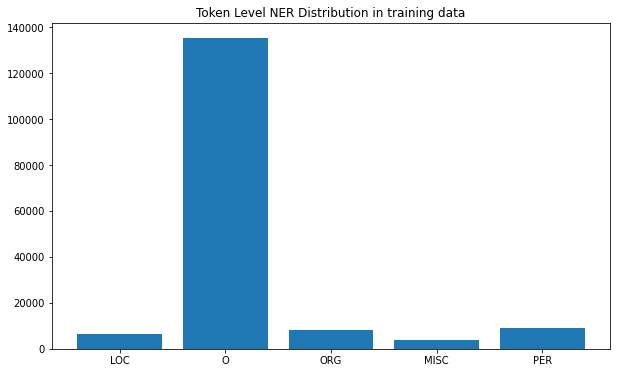

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
NER_count={}                                        # Moving through every position in our list of list of NER
for l in train["NER"]:
  for i in range(len(l)): 
        if l[i] in  NER_count:
            NER_count[l[i]] += 1                     # Incrementing the NER dictionary values for every NER found 
        else:
            NER_count[l[i]] = 1
keys = NER_count.keys()
values = NER_count.values()            
plt.title("Token Level NER Distribution in training data")
plt.bar(keys, values)
NER_count



### Entity level NER Distribution - Training Data

{'LOC': 6556, 'MISC': 3659, 'ORG': 8065, 'PER': 8875}

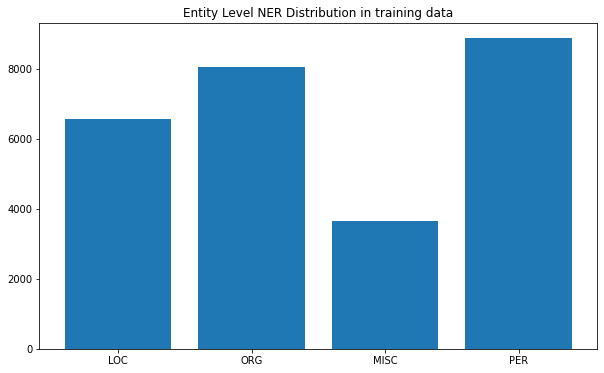

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
NER_adj_count={}      # Moving through every position in our list of list of NER
for l in train["NER"]:
  for i in range(len(l)):
        if l[i] in ["ORG","MISC","LOC","PER"]:
          if l[i] in  NER_adj_count:
              NER_adj_count[l[i]] += 1# Incrementing the NER dictionary values  
          else:                       #for every NER found
              NER_adj_count[l[i]] = 1
keys = NER_adj_count.keys()
values = NER_adj_count.values()            
plt.title("Entity Level NER Distribution in training data")
plt.bar(keys, values)
NER_adj_count

### Visualizing Named Entities - Training Data

In [ ]:
print("[", end =" ")
for i in train["index"][0]:
  if train["NER"][0][i] in ["LOC","ORG","MISC","PER"]:
    print("[",train["NER"][0][i], end =" ")
    print(train["text"][0][i],"]", end =" ")
  else:
    print(train["text"][0][i], end =" ")
print("]", end =" ")    

[ [ LOC Romania ] state budget soars in June . [ LOC BUCHAREST ] 1996-08-28 [ LOC Romania ] 's state budget deficit jumped sharply in June to 1,242.9 billion lei for the January-June period from 596.5 billion lei in January-May , official data showed on Wednesday . Six-month expenditures stood at 9.50 trillion lei , up from 7.56 trillion lei at end-May , with education and health spending accounting for 31.6 percent of state expenses and economic subsidies and support taking some 26 percent . January-June revenues went up to 8.26 trillion lei from 6.96 trillion lei in the first five months this year . [ LOC Romania ] 's government is expected to revise the 1996 budget on Wednesday to bring it into line with higher inflation , new wage and pension indexations and costs of energy imports that have pushed up the state deficit . Under the revised version state spending is expected to rise by some 566 billion lei . No new deficit forecast has been issued so far . In July the government gave

# **Part 2: Hidden Markov Model** 🧨

---

1. Code for counting and smoothing of labels and words and unkown word handing as necessary to support the Viterbi algorithm. (This is pretty much what you already know how to do from project 1.)
2. Build a Hidden Markov Model in accordance with the starter code that has been provided. If you wish to change this starter code you can. However, please ensure that your code is clear, concise, and, most important of all, modular. So break your implementation down into functions or write it within a class. We suggest you compute all probabilities in a log form when building the HMM.
3. An implementation of the **Viterbi algorithm** that can be used to infer token-level labels (identifying the appropriate named entity) for an input document. This process is commonly referred to as **decoding**. Bigram-based Viterbi is $ \mathcal{O}(sm^2)$ where s is the length of the sentence and m is the number of tags. Your implementation should have similar efficiency. The code for this can be used later on for the MEMM too.

Code of Academic Integrity:  We encourage collaboration regarding ideas, etc. However, please **do not copy code from online or share code with other students**. We will be running programs to detect plagiarism.


## **Unknown Word Handling**
---

In [ ]:
# Implement unknown word handling here! You may do this any way that you please

def uwh(tokens):
    
    token_count={} # Moving through every position in our list of list of NER
    for l in tokens:
      for i in range(len(l)): 
        if l[i] in  token_count:
            token_count[l[i]] += 1 # Incrementing the NER dictionary 
        else:                       #values for every NER found 
            token_count[l[i]] = 1
    not_vocabulary = [k for k in token_count if token_count[k] <2]

    for l in tokens:
      for w in range(len(l)):
        # test if word w is in vocabulary
        if l[w] in not_vocabulary:
            l[w] = "UNK"
    return tokens


## **HMM Implementation**

---

The code below is just a suggestion for how you may go about building your HMM. Feel free to change it any way you see fit. In fact, you will probably have to tweak it a little to implement smoothing. In the skeleton code below, we have broken down the HMM into its three components: the transition matrix, the emission (i.e., lexical generation, observation) matrix, and the starting state probabilities. We suggest you implement them separately and then use them to build the HMM.

Note: it may help to map your classes (named entity types) to discrete values rather than string labels as you will have to do this for your MEMM anyways. However, the HMM can be done without this.

In [ ]:
# A Token count function that takes in a list of tokens and returns 
#token dictionary 

def token_count(tokens):
  token_count={}  # Moving through every position in our list of list of tokens
  for l in tokens:
      for i in range(len(l)): 
        if l[i] in  token_count:
            token_count[l[i]] += 1   # Incrementing the tokens dictionary  
        else:                       #values for every NER found
            token_count[l[i]] = 1
  return token_count         

In [ ]:
# A transition matrix probability building function that returns 
# the transition probabilities while taking the NER tags and the smooothing 
#k values as inputs

def build_transition_matrix(labels,k_trans):
   
    # COUNTS OF TRANSITION_NER

    transition_NER_count={}# An empty dictionary to store transition counts 
    for l in labels:       # of NER
      for i in range(len(l) - 1):# Moving through every position in our list 
        temp = (l[i], l[i+1])    #of list of NER                        
        if not temp in transition_NER_count: # Generating transition counts 
            transition_NER_count[temp] = 1   #based on the position
        else:
            transition_NER_count[temp] += 1 # Incrementing the transition  
                              #dictionary values for every NER transition found
    # print ("NER transition counts", transition_NER_count)
    
    # COUNTS OF NER

    NER_count={}  # Moving through every position in our list of list of NER
    for l in labels:
      for i in range(len(l)): 
        if l[i] in  NER_count:
            NER_count[l[i]] += 1 # Incrementing the NER dictionary  
        else:                     #values for every NER found
            NER_count[l[i]] = 1

    # print ("NER counts",NER_count)

    smoothed_transition_NER_pro={}


    for key, value in transition_NER_count.items():     # Traversing through key
                           #value pairs in the transition NER counts dictionary
 # Generating the tarnsition probability based on the count of the prior NER 
#and current NER tuple                                                 
# from the transition counts dictionary and the NER count from the NER dictionary
        smoothed_transition_NER_pro[key] = (transition_NER_count[key]+ 
                                    k_trans)/(NER_count[key[0]] + (k_trans*5))
        
    return smoothed_transition_NER_pro   
 

In [ ]:
def NER_count():
  NER_count={}  # Moving through every position in our list of list of NER
  for l in labels:
      for i in range(len(l)): 
        if l[i] in  NER_count:
            # Incrementing the NER dictionary values for every NER found
            NER_count[l[i]] += 1               
        else:
            NER_count[l[i]] = 1
  return NER_count

In [ ]:
# A emmission matrix probability building function that 
#returns the emission probabilities taking the tokens, NER tags 
#and the smooothing k values as inputs

def build_emission_matrix(tokens, labels,k_emiss):

# COUNTS OF NER-TOKEN COMBINATION

    NER_Token_count={}    # An empty dictionary to store emission counts of NER
    for l,t in zip(labels,tokens):# Moving through every position in our list of 
        for p,q in zip(l,t):    #list of NER
          temp = (p,q)   # Generating emission counts based on the position
          if not temp in NER_Token_count:
            NER_Token_count[temp] = 1        
          else:# Incrementing the emission dictionary values for everyemission
            NER_Token_count[temp] += 1

    # print ("Label - Token counts", NER_Token_count)

  # COUNTS OF NER

    NER_count={}  # Moving through every position in our list of list of NER
    for l in labels:
      for i in range(len(l)): 
        if l[i] in  NER_count:
            NER_count[l[i]] += 1 # Incrementing the NER dictionary values  
        else:     #for every NER found
            NER_count[l[i]] = 1
    
    # print ("NER counts",NER_count)
    smoothed_NER_token_pro={}                   
    # An empty dictionary to store emission probability of NER
    smoothed_unseen_NER_token_pro={}            
    # An empty dictionary to store unseen emission probability of NER
    vocab_size = len(token_count(tokens).keys())
    for key, value in NER_Token_count.items():       
        smoothed_NER_token_pro[key] = (NER_Token_count[key]+ k_emiss)/(NER_count[key[0]] + (k_emiss*vocab_size))
        smoothed_unseen_NER_token_pro[key[1]] = (k_emiss)/(NER_count[key[0]] + (k_emiss*vocab_size))
    return smoothed_NER_token_pro, smoothed_unseen_NER_token_pro


In [ ]:
# returns the starting state probabilities
def get_start_state_probs(labels,k_start):
  Initial_count_NER = {}
  for l in labels:
    if l[0] in  Initial_count_NER:
            Initial_count_NER[l[0]] += 1              
            # Incrementing the NER dictionary values for every NER found 
    else:
            Initial_count_NER[l[0]] = 1
  #print(Initial_count_NER)
  start_state_prob = {}
  for key, value in  Initial_count_NER.items():       
    # Traversing through key value pairs in the NER dictionary
        start_state_prob[key] = (Initial_count_NER[key] + k_start)/(sum(Initial_count_NER.values())+(k_start*5))
  return  start_state_prob

In [ ]:
# takes in the tokens & labels and smoothing 
#parameters returns all the porbaabilities measures for representing of the HMM

def build_hmm(tokens, labels, k_emiss,k_trans,k_start):
  trans_prob = build_transition_matrix(labels,k_trans)
  init_prob = get_start_state_probs(labels,k_start)
  emmis_prob,unseen_emmis_prob = build_emission_matrix(tokens,labels, k_emiss)

  return trans_prob, init_prob,emmis_prob,unseen_emmis_prob

## **Viterbi Implementation**

---

At the end of your implementation, we expect a function or class that maps a sequence of tokens (observation) to a sequence of labels via the Viterbi algorithm.

In [ ]:
# A function that takes in the hmm build above and an observation: list of tokens
# and returns the appropriate named entity mappings for the tokens, 
#the actual NER tags, the word whose NER tags is being predicted and the NER index
import numpy as np
import pandas as pd
from collections import defaultdict
def viterbi(hmm, document):
  
#a.	trans_prob – A dictionary to store the transition probabilities 
#(from a prior NER tag) for every NER tag possible for a token
#$c.	emmis_prob - A dictionary to store the emission probabilities 
#(to a particular token) for every NER tag possible for a token                
#b.	init_prob - A dictionary to store the initial tag probabilities 
#for every NER tag possible for a token      
#d.	unseen_emmis_prob - A dictionary to store the unseen emission 
#probabilities (using unknown word handler “unk”) for every NER tag of a token                      
  trans_prob,init_prob,emmis_prob,unseen_emmis_prob  = hmm[0], hmm[1], hmm[2],hmm[3]
#f.	NER_path  - A list, to store the NER’s predicted by our algorithm
  NER_path =[] 
#g.	NER_word - A list, to store the associated tokens of the predicted NERs
  NER_word =[]
#h.	NER_prior - A list, to store the maximum of predicted NER probability values 
#for a given token                             
  NER_index =[]                           
#i.	NER_index - A list, to store the index of the predicted NERs                             
  NER_actual=[]
#j.	NER_actual - A list, to store the actual NERs of tokens
  NER_prob= {}
#k.	NER_prob - A dictionary, to store probabilities of the predicted NERs
  total_tokens, Uniq_tokens = list_0fList_count(X_train)
  total_tokens = len(total_tokens)
  vocab_size= len(Uniq_tokens)
  NER_prob_2={} # our Vitrebi score matrix
  best_NER_prior={} # backpointer storing the best prior NER tags for any given NER tag and a word
  best_NER_prior_prob_dic={} # Dictionary to store all such backpointer values storing the best prior NER tags for any given NER tag and a word
  NER_prob_t={}# our temporary Viterbi score matrix
  NER_rest=[] # to store the previous best NER tag once backward pass is started
  

  #Forward Pass Implmentation
  #Initialization of the Viterbi Matrix
  for i in range(len(document['text'])):  
    for NER in NER_uniq:
        if (NER,document['text'][i][0]) in emmis_prob:
          NER_prob[NER] = init_prob[NER] * emmis_prob[(NER,document['text'][i][0])]
          # print("Init -prob Taken (",observation[0],NER,")")
        elif document['text'][i][0] in unseen_emmis_prob:
          NER_prob[NER] = init_prob [NER] * unseen_emmis_prob[document['text'][i][0]]
          # print("Init - prob Taken unseen (",observation[0],NER,")")
        elif ("UNK",NER) in emmis_prob:  
          NER_prob[NER] = init_prob [NER] * emmis_prob[("UNK",NER)]
          # print("Init - prob Taken (UNK",NER,")")
        #else:
          #NER_prob[NER] = init_prob [NER] * unseen_emmis_prob["UNK"]
          # print("Init - prob Taken unseen (UNK",NER,")")
        else:
          NER_prob[NER] = init_prob[NER] * 1/(total_tokens + (1*vocab_size))

    NER_new = max(NER_prob, key= NER_prob.get)
    NER_path.append(NER_new) 
    NER_word.append(document['text'][i][0])
    NER_index.append(document['index'][i][0])
    NER_actual.append(document['NER'][i][0])

#Splittting into two runs ( between the second word of a sentence and the rest)
# to accomodate the storing of the Viterbi score matrix
    for j in range(len(document['text'][i][1:])):
      if j ==0 :
        
        for NER in NER_uniq:
            for NER_prior_n in NER_uniq:
              if (NER,document['text'][i][j]) in emmis_prob:
                NER_prob_2[(NER,NER_prior_n)] = NER_prob[NER_prior_n] * trans_prob [(NER_prior_n,NER)] * emmis_prob[(NER,document['text'][i][j])]
                        # print("Taken (",word,NER,")")
              elif document['text'][i][j] in unseen_emmis_prob:
                NER_prob_2[(NER,NER_prior_n)] = NER_prob[NER_prior_n]* trans_prob [(NER_prior_n,NER)] * unseen_emmis_prob[document['text'][i][j]]
                # print("Taken unseen (",word,NER,")")
              elif ("UNK",NER) in emmis_prob:  
                NER_prob_2[(NER,NER_prior_n)] = NER_prob[NER_prior_n]* trans_prob [(NER_prior_n,NER)] * emmis_prob[("UNK",NER)]
                # print("Taken (UNK",NER,")")
              #else:
                #NER_prob[NER] = trans_prob [(NER_prior,NER)] * unseen_emmis_prob["UNK"]

              else:
                NER_prob_2[(NER,NER_prior_n)] = init_prob[NER] * 1/(total_tokens + (1*vocab_size))
            best_NER_prior[NER] = max(NER_prob_2, key= NER_prob_2.get)
            best_NER_prior_prob_dic[document['text'][i][j]] =  best_NER_prior
            NER_new = max(NER_prob, key= NER_prob.get) 
        NER_word.append(document['text'][i][j])
        NER_index.append(document['index'][i][j])
        NER_actual.append(document['NER'][i][j])
      
        
        for NER in NER_uniq:
           for NER_prior_n in NER_uniq:
               NER_prob_t[(NER,NER_prior_n)]= NER_prob_2[(NER,NER_prior_n)] # New score matrix
      
      else:
         
          for NER in NER_uniq:
              for NER_prior_n in NER_uniq:
                if (NER,document['text'][i][j]) in emmis_prob:
                  NER_prob_2[(NER,NER_prior_n)] = NER_prob_t[(NER,NER_prior_n)] * trans_prob [(NER_prior_n,NER)] * emmis_prob[(NER,document['text'][i][j])]
                          # print("Taken (",word,NER,")")
                elif document['text'][i][j] in unseen_emmis_prob:
                  NER_prob_2[(NER,NER_prior_n)] = NER_prob_t[(NER,NER_prior_n)]* trans_prob [(NER_prior_n,NER)] * unseen_emmis_prob[document['text'][i][j]]
                  # print("Taken unseen (",word,NER,")")
                elif ("UNK",NER) in emmis_prob:  
                  NER_prob_2[(NER,NER_prior_n)] = NER_prob_t[(NER,NER_prior_n)]* trans_prob [(NER_prior_n,NER)] * emmis_prob[("UNK",NER)]
                  # print("Taken (UNK",NER,")")
                #else:
                  #NER_prob[NER] = trans_prob [(NER_prior,NER)] * unseen_emmis_prob["UNK"]

                else:
                  NER_prob_2[(NER,NER_prior_n)] = init_prob[NER] * 1/(total_tokens + (1*vocab_size))
              NER_prob_t=NER_prob_2   
              best_NER_prior[NER] = max(NER_prob_2, key= NER_prob_2.get)
              best_NER_prior_prob_dic[document['text'][i][j]] =  best_NER_prior
              NER_new = max(NER_prob_t, key= NER_prob_t.get) 
          NER_word.append(document['text'][i][j])
          NER_index.append(document['index'][i][j])
          NER_actual.append(document['NER'][i][j])
                  
        
 
    # Backward pass implementation
    NER_path.extend(NER_new)    
    NER_new_word = NER_new[1]   
    #Backtracing to find the best possible NER tags for a sentence
    while(j>=0):
      NER_rest = best_NER_prior_prob_dic[document['text'][i][j]][NER_new_word]
      NER_path.append(NER_rest[1])
      NER_new_word = NER_rest[1]
      j=j-1   


      
  return NER_path,NER_word,NER_index,NER_actual

In [ ]:
# here's a samplle observations that you can use to test your code
obs_1 = ['Cornelll',
 'University',
 'is',
 'located',
 'in',
 'Ithaca',
 'and',
 'was',
 'founded',
 'by',
 'Ezra',
 'Cornell']


## **Validation Step**

---

In this part of the project, we expect you to split the training data into train and validation datasets. You may use whatever split you see fit and use any external libraries to perform this split. You may want to look into the following function for splitting data: [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Once you have split the data, train your HMM model on the training data and evaluate it on the validation data. Report **Entity Level Mean F1**, which was explained earlier. Please use the code we have provided below to compute this metric.

Please also take a look into your misclassified cases, as we will be performing error analysis in the *Evaluation* section. We expect smoothing, unknown word handling and correct emission (i.e., lexical generation) probabilities.

Consider the example below. After getting a sequence of NER labels for the sequence of tokens from your Viterbi algorithm implementation, you need to convert the sequence of tokens, associated token indices and NER labels into a format which can be used to calculate **Entity Level Mean F1**. We do this by finding the starting and ending indices of the spans representing each entity (as given in the corpus) and adding it to a list that is associated with the label with which the spans are labelled. To score your validation data on Google Colab or your local device, you can get a dictionary format as shown in the picture below from the function **format_output_labels** of both the predicted and true label sequences, and use the two dictionaries as input to the **mean_f1** function.

NOTE: We do **not** include the spans of the tokens labelled as "O" in the formatted dictionary output.

![picture](https://docs.google.com/uc?export=download&id=1M57DEHgfusVPU_hlvmiOpkS3yn9GGEgj)

In [ ]:
# Training Validation splitting
import random
random.seed(1234)
NER_uniq =['LOC', 'MISC', 'O', 'ORG', 'PER']

# Create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train["text"], train["NER"], test_size=0.1, random_state=0)
X_train_POS, X_val_POS, y_train_POS, y_val_POS = train_test_split(train["text"], train["POS"], test_size=0.1, random_state=0)
X_train_index, X_val_index, y_train_index, y_val_index = train_test_split(train["text"], train["index"], test_size=0.1, random_state=0)

#Combining validation splits to form the entire validation data
X_valid={}
X_valid["text"]=X_val
X_valid["NER"]=y_val
X_valid["POS"]=y_val_POS
X_valid["index"]=y_val_index

# Training HMM

 #1. Building HMM
 
   #a. Unknown Word handled Training set

X_train_text_uwh = uwh(X_train)    

    #b. Creating the HMM 

HMM = build_hmm(X_train,y_train,1,1,1) 


 # Applying Viterbi-HMM on validation set
 
NER_pred_hmm,NER_word_hmm,NER_index_hmm,NER_actual_hmm =viterbi(HMM,X_valid)


In [ ]:
# Dsiplaying the prediction values vs the orginal NER values
print(NER_pred_hmm[0:17459])
print(NER_word_hmm)
print(NER_index_hmm)
print(NER_actual_hmm)


['O', 'O', 'O', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [ ]:
def format_output_labels(token_labels, token_indices):
    """
    Returns a dictionary that has the labels (LOC, ORG, MISC or PER) as the keys, 
    with the associated value being the list of entities predicted to be of that key label. 
    Each entity is specified by its starting and ending position indicated in [token_indices].

    Eg. if [token_labels] = ["ORG", "ORG", "O", "O", "ORG"]
           [token_indices] = [15, 16, 17, 18, 19]
        then dictionary returned is 
        {'LOC': [], 'MISC': [], 'ORG': [(15, 16), (19, 19)], 'PER': []}

    :parameter token_labels: A list of token labels (eg. PER, LOC, ORG or MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = {"LOC":[], "MISC":[], "ORG":[], "PER":[]}
    prev_label = token_labels[0]
    start = token_indices[0]
    for idx, label in enumerate(token_labels):
      if prev_label != label:
        end = token_indices[idx-1]
        if prev_label != "O":
            label_dict[prev_label].append((start, end))
        start = token_indices[idx]
      prev_label = label
      if idx == len(token_labels) - 1:
        if prev_label != "O":
            label_dict[prev_label].append((start, token_indices[idx]))
    return label_dict

In [ ]:
# Code for mean F1

import numpy as np

def mean_f1(y_pred_dict, y_true_dict):
    """ 
    Calculates the entity-level mean F1 score given the actual/true and 
    predicted span labels.
    :parameter y_pred_dict: A dictionary containing predicted labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_pred_dict: Dict<key [String] : value List[Tuple]>
    :parameter y_true_dict: A dictionary containing true labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_true_dict: Dict<key [String] : value List[Tuple]>

    Implementation modified from original by author @shonenkov at
    https://www.kaggle.com/shonenkov/competition-metrics.
    """
    F1_lst = []
    for key in y_true_dict:
        TP, FN, FP = 0, 0, 0
        num_correct, num_true = 0, 0
        preds = y_pred_dict[key]
        trues = y_true_dict[key]
        for true in trues:
            num_true += 1
            if true in preds:
                num_correct += 1
            else:
                continue
        num_pred = len(preds)
        if num_true != 0:
            if num_pred != 0 and num_correct != 0:
                R = num_correct / num_true
                P = num_correct / num_pred
                F1 = 2*P*R / (P + R)
            else:
                F1 = 0      # either no predictions or no correct predictions
        else:
            continue
        F1_lst.append(F1)
    return np.mean(F1_lst)

In [ ]:
# Usage using above example

pred_token_labels = ["ORG", "O", "PER", "PER", "O", "LOC", "O", "O", "O", "O", "MISC", "O", "O", "O", "O", "LOC"]
true_token_labels = ["ORG", "O", "PER", "PER", "O", "LOC", "O", "O", "O", "O", "MISC", "MISC", "O", "O", "O", "LOC"]
token_indices = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

y_pred_dict = format_output_labels(pred_token_labels, token_indices)
print("y_pred_dict is : " + str(y_pred_dict))
y_true_dict = format_output_labels(true_token_labels, token_indices)
print("y_true_dict is : " + str(y_true_dict))

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict, y_true_dict)))

y_pred_dict is : {'LOC': [(18, 18), (28, 28)], 'MISC': [(23, 23)], 'ORG': [(13, 13)], 'PER': [(15, 16)]}
y_true_dict is : {'LOC': [(18, 18), (28, 28)], 'MISC': [(23, 24)], 'ORG': [(13, 13)], 'PER': [(15, 16)]}
Entity Level Mean F1 score is : 0.75


In [ ]:
# Evaluate/validate your model here

pred_token_labels = NER_pred_hmm[0:17459]
true_token_labels = NER_actual_hmm
token_indices = NER_index_hmm

y_pred_dict = format_output_labels(pred_token_labels, token_indices)
print("y_pred_dict is : " + str(y_pred_dict))
y_true_dict = format_output_labels(true_token_labels, token_indices)
print("y_true_dict is : " + str(y_true_dict))

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict, y_true_dict)))

y_pred_dict is : {'LOC': [(138198, 157518), (85825, 85825), (16226, 16226), (89700, 89700), (7181, 141665), (4463, 4463), (42877, 95570), (2241, 33417), (33420, 44130), (5118, 160755), (79802, 79802), (105589, 105589), (37314, 32736), (32739, 96766), (96768, 54730), (100584, 22258), (1150, 68954), (86461, 121815), (121818, 121841), (121844, 15723), (88905, 88905), (351, 72435), (72437, 93497), (41517, 125551), (50299, 23997), (134029, 75876), (121600, 131356), (140384, 140482), (36603, 36603), (36605, 36653), (36748, 36748), (36751, 117573)], 'MISC': [(22259, 22259), (68955, 68955), (25506, 25506), (15724, 15724), (114249, 114249), (349, 349), (41515, 41515), (134026, 134026), (36654, 36654)], 'ORG': [(157519, 157519), (44131, 44131), (119312, 119312), (22262, 22262), (22264, 22264), (22266, 22266), (22268, 22268), (22270, 22270), (22272, 22272), (22274, 22274), (22276, 22276), (22278, 22278), (22280, 22280), (22282, 22282), (22284, 22284), (22286, 22286), (22288, 22288), (22290, 22290

In [ ]:
# Building a confusion matrix to see the classification results from HMM Model
import pandas as pd
y_true = pd.Series(NER_actual_hmm)
y_pred = pd.Series(NER_pred_hmm)

print(pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted   LOC  MISC      O   ORG   PER    All
True                                           
LOC        1786    19    488    95    16   2404
MISC         61   941    393    37     5   1437
O            17    28  50652    41    12  50750
ORG         233    71   1442  1253    28   3027
PER          27     9   1740    26  1439   3241
All        2124  1068  54715  1452  1500  60859


### **Q2.1: Explain your HMM Implementations**

Explain how you implemented the HMM including the Viterbi algorithm (e.g. **which algorithms/data structures** you used). Make clear which parts were implemented from scratch vs. obtained via an existing package. Explain and motivate any design choices providing the intuition behind them (e.g. which methods you used for your HMM implementation, and why?). (Please answer on the written questions template document)


### **Q2.2: Results Analysis**

Explain here how you evaluated the models. Summarize the performance of your system and any variations that you experimented with on the validation datasets. Put the results into clearly labeled tables or diagrams and include your observations and analysis. (Please answer on the written questions template document)


### **Q2.3: Error Analysis**
When did the system work well? When did it fail?  Any ideas as to why? How might you improve the system? (Please answer on the written questions template document)


### **Q2.4: What is the effect of unknown word handling and smoothing?**
(Please answer on the written questions template document)

# **Part 3: Maximum Entropy Markov Model** 💫

---

In this section, you will implement a Maximum Entropy Markov Model (**MEMM**) to perform the same NER task. Your model should consist of a MaxEnt classifier with Viterbi decoding. 

1. We have already performed tokenizations for documents. You can either use a MaxEnt classifier from an existing package or write the MaxEnt code yourself. **Important note:  MaxEnt classifiers are statistically equivalent to multi-class logistic regression, so you can use packages for multi-class LR instead of MaxEnt.**

2. Use the classifier to learn a probability $P(t_i|features)$. You may replace either the lexical generation probability – $P(w_i|t_i)$ – or the transition probability – $P(t_i|t_{i−1})$ – in the HMM with it, or you may replace the entire *lexical generation probability * transition probability*  calculation – $P (w_i|t_i) ∗ P (t_i|t_{i−1)} – $ in the HMM with it. 

3. To train such classifier, you need to pick some feature set. The content of the feature set is up to your choice. You should be trying different feature sets, and evaluate your choices on the validation set. Pick the feature set that performs overall the best according to the F1 measure. If you draw inspiration for your features from external sources, please link them in the code.

4. Use your own implementation of the **Viterbi algorithm**, which you can modify from the one you developed for the HMM model. You will need the probabilities that you obtain from the MaxEnt classifier. 

5. Remember to use same training and validation split when evaluating the MEMM to have a **fair comparison** with your **HMM model**.


Please also take a look into your misclassified cases, as we will be performing error analysis in *Evaluation* section. 





---
Here's a summary of the workflow for Part 3:

![alt text](https://drive.google.com/uc?export=view&id=14VfjW3yDyXLojWM_u0LeJYdDOSLkElBn)




Note that we have not provided any skeleton code for how you should do feature engineering since this is meant to be an open ended task and we want you to experiment with the dataset. However, please remember to make sure that you code is concise, clean, and readable! Ultimately, we expect a function or class  mapping a sequence of tokens to a sequence of labels. At the end of this section you should have done the following:
1. Extract Features
2. Build & Train MaxEnt
3. Call Viterbi when evaluating

### **Feature Engineering**
---

In [ ]:
# Your implementation here
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer


# input corpus (list of tokens --- 2D) and pos
def create_features(text, pos):

  # feature for previous POS
  prev_pos = copy.deepcopy(pos)

  # feature for next POS
  next_pos = copy.deepcopy(pos)

  # feature for previous word
  prev_word = copy.deepcopy(text)

  # feature for next word
  next_word = copy.deepcopy(text)


  # list of dict for features
  features = []

  # adjust for starting and ending
  for i, line in enumerate(text):
    prev_pos[i].insert(0, "NA")
    prev_pos[i].pop()

    next_pos[i].append("NA")
    next_pos[i].pop(0)   

    prev_word[i].insert(0, "Start")
    prev_word[i].pop()

    next_word[i].append("End")
    next_word[i].pop(0)


    # merge features into dictionary
    for j, word in enumerate(line):
        feature = dict()
        feature["word"] = word
        feature["pos"] = pos[i][j]
        feature["prev_pos"] = prev_pos[i][j]
        feature["next_pos"] = next_pos[i][j]
        feature["prev_word"] = prev_word[i][j]
        feature["next_word"] = next_word[i][j]
        features.append(feature)

  return features

In [ ]:
# same as the above
# used for viterbi
# features for a singel line

def create_features_sents(text, pos):
  
  prev_pos = copy.deepcopy(pos)


  
  next_pos = copy.deepcopy(pos)


  
  prev_word = copy.deepcopy(text)

  
  next_word = copy.deepcopy(text)
  

  features = []
  
  prev_pos.insert(0, "NA")
  prev_pos.pop()

  next_pos.append("NA")
  next_pos.pop(0)   

  prev_word.insert(0, "Start")
  prev_word.pop()

  next_word.append("End")
  next_word.pop(0)

  for i, word in enumerate(text):
            feature = {}
            feature["word"] = word
            feature["pos"] = pos[i]
            feature["prev_pos"] = prev_pos[i]
            feature["next_pos"] = next_pos[i]
            feature["prev_word"] = prev_word[i]
            feature["next_word"] = next_word[i]
            features.append(feature)

  return features

In [ ]:
# Building the MaxEnt model that takesa list of tokens as input and returns probability of geteting an NER tag based on features defined
def build_memm_transition_matrix(tokens):
  # use dictvectorizer to transform features
   from itertools import chain
   vector = DictVectorizer()
   X_val = tokens["text"]
   y_val_POS = tokens["POS"]
   X_train_features = create_features(X_train, y_train_POS)
   X_train_trans = vector.fit_transform(X_train_features) 
   X_val_features = create_features(X_val, y_val_POS)
   X_val_trans = vector.transform(X_val_features) 
   
   words=[]
   tran_prob_dic={}

# Logistic Multinomial Model implementation
   model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
   Y_train = list(chain.from_iterable(y_train))
   clf = model.fit(X_train_trans, Y_train)
   coef = clf.coef_
   
# Creating a (word, predicted NER) dictionary and retirning the same 
   for dic in X_val_features:
    words.append(dic['word']) 
   df = pd.DataFrame(clf.predict_proba(X_val_trans), columns=clf.classes_)
   df['Pred_NER'] = df.idxmax(axis=1)
   df['NER_prob']= df.max(axis=1)
   df['word'] = words
   for p,n,w in zip(df['Pred_NER'],df['NER_prob'],df['word']):
      tran_prob_dic[(p,w)]=n       
   return tran_prob_dic

In [ ]:
# takes in the tokens & labels and smoothing parameters returns all the probabilities measures for representing of the MEMM
def build_memm(tokens, labels, k_emiss,k_start):
  init_prob = get_start_state_probs(labels,k_start)
  emmis_prob,unseen_emmis_prob = build_emission_matrix(tokens,labels, k_emiss)

  return init_prob,emmis_prob,unseen_emmis_prob


### **MEMM Implementation**
---

In [ ]:
# A function that takes in the hmm build above and an observation: list of tokens
# and returns the appropriate named entity mappings for the tokens, 
#the actual NER tags, the word whose NER tags is being predicted and the NER index
import numpy as np
import pandas as pd
from collections import defaultdict
def viterbi_MEMM(document, memm):
  
#a.	trans_prob – A dictionary to store the transition probabilities 
#(from a prior NER tag) for every NER tag possible for a token
#$c.	emmis_prob - A dictionary to store the emission probabilities 
#(to a particular token) for every NER tag possible for a token                
#b.	init_prob - A dictionary to store the initial tag probabilities 
#for every NER tag possible for a token      
#d.	unseen_emmis_prob - A dictionary to store the unseen emission 
#probabilities (using unknown word handler “unk”) for every NER tag of a token                      
  init_prob,emmis_prob,unseen_emmis_prob  =  memm[0], memm[1],memm[2]
  maxent_prob = build_memm_transition_matrix(document) 
#f.	NER_path  - A list, to store the NER’s predicted by our algorithm
  NER_path =[] 
#g.	NER_word - A list, to store the associated tokens of the predicted NERs
  NER_word =[]
#h.	NER_prior - A list, to store the maximum of predicted NER probability values 
#for a given token                             
  NER_index =[]                           
#i.	NER_index - A list, to store the index of the predicted NERs                             
  NER_actual=[]
#j.	NER_actual - A list, to store the actual NERs of tokens
  NER_prob= {}
#k.	NER_prob - A dictionary, to store probabilities of the predicted NERs
  total_tokens, Uniq_tokens = list_0fList_count(X_train)
  total_tokens = len(total_tokens)
  vocab_size= len(Uniq_tokens)
  NER_prob_2={} # our Vitrebi score matrix
  best_NER_prior={} # backpointer storing the best prior NER tags for any given NER tag and a word
  best_NER_prior_prob_dic={} # Dictionary to store all such backpointer values storing the best prior NER tags for any given NER tag and a word
  NER_prob_t={}# our temporary Viterbi score matrix
  NER_rest=[] # to store the previous best NER tag once backward pass is started
  
  #Forward Pass Implmentation
  #Initialization of the Viterbi Matrix 
  for i in range(len(document['text'])):  
    for NER in NER_uniq:
        if (NER,document['text'][i][0]) in emmis_prob:
          NER_prob[NER] = init_prob[NER] * emmis_prob[(NER,document['text'][i][0])]
          # print("Init -prob Taken (",observation[0],NER,")")
        elif document['text'][i][0] in unseen_emmis_prob:
          NER_prob[NER] = init_prob [NER] * unseen_emmis_prob[document['text'][i][0]]
          # print("Init - prob Taken unseen (",observation[0],NER,")")
        elif ("UNK",NER) in emmis_prob:  
          NER_prob[NER] = init_prob [NER] * emmis_prob[("UNK",NER)]
          # print("Init - prob Taken (UNK",NER,")")
        #else:
          #NER_prob[NER] = init_prob [NER] * unseen_emmis_prob["UNK"]
          # print("Init - prob Taken unseen (UNK",NER,")")
        else:
          NER_prob[NER] = init_prob[NER] * 1/(total_tokens + (1*vocab_size))

    NER_new = max(NER_prob, key= NER_prob.get)
    NER_path.append(NER_new) # Backtracking the correct NER sequence
    NER_word.append(document['text'][i][0])
    NER_index.append(document['index'][i][0])
    NER_actual.append(document['NER'][i][0])

#Splittting into two runs ( between the second word of a sentence and the rest)
# to accomodate the storing of the Viterbi score matrix
    for j in range(len(document['text'][i][1:])):
      if j ==0 :      
        for NER in NER_uniq:
            for NER_prior_n in NER_uniq:
              if (NER,document['text'][i][j]) in emmis_prob and (NER,document['text'][i][j]) in maxent_prob:
                NER_prob_2[(NER,NER_prior_n)] = NER_prob[NER_prior_n] * maxent_prob [(NER,document['text'][i][j])] * emmis_prob[(NER,document['text'][i][j])]
                        # print("Taken (",word,NER,")")
              elif document['text'][i][j] in unseen_emmis_prob and (NER,document['text'][i][j]) in maxent_prob:
                NER_prob_2[(NER,NER_prior_n)] = NER_prob[NER_prior_n]* maxent_prob [(NER,document['text'][i][j])] * unseen_emmis_prob[document['text'][i][j]]
                # print("Taken unseen (",word,NER,")")
              elif ("UNK",NER) in emmis_prob and (NER,document['text'][i][j]) in maxent_prob:  
                NER_prob_2[(NER,NER_prior_n)] = NER_prob[NER_prior_n]* maxent_prob [(NER,document['text'][i][j])] * emmis_prob[("UNK",NER)]
                # print("Taken (UNK",NER,")")
              #else:
                #NER_prob[NER] = trans_prob [(NER_prior,NER)] * unseen_emmis_prob["UNK"]

              else:
                NER_prob_2[(NER,NER_prior_n)] = init_prob[NER] * 1/(total_tokens + (1*vocab_size))
            best_NER_prior[NER] = max(NER_prob_2, key= NER_prob_2.get)
            best_NER_prior_prob_dic[document['text'][i][j]] =  best_NER_prior
            NER_new = max(NER_prob, key= NER_prob.get) 
        NER_word.append(document['text'][i][j])
        NER_index.append(document['index'][i][j])
        NER_actual.append(document['NER'][i][j])
      
        
        for NER in NER_uniq:
           for NER_prior_n in NER_uniq:
               NER_prob_t[(NER,NER_prior_n)]= NER_prob_2[(NER,NER_prior_n)] # New score matrix
      else:
         
          for NER in NER_uniq:
              for NER_prior_n in NER_uniq:
                if (NER,document['text'][i][j]) in emmis_prob and (NER,document['text'][i][j]) in maxent_prob:
                  NER_prob_2[(NER,NER_prior_n)] = NER_prob_t[(NER,NER_prior_n)] * maxent_prob [(NER,document['text'][i][j])] * emmis_prob[(NER,document['text'][i][j])]
                          # print("Taken (",word,NER,")")
                elif document['text'][i][j] in unseen_emmis_prob and (NER,document['text'][i][j]) in maxent_prob:
                  NER_prob_2[(NER,NER_prior_n)] = NER_prob_t[(NER,NER_prior_n)]* maxent_prob [(NER,document['text'][i][j])] * unseen_emmis_prob[document['text'][i][j]]
                  # print("Taken unseen (",word,NER,")")
                elif ("UNK",NER) in emmis_prob and (NER,document['text'][i][j]) in maxent_prob:  
                  NER_prob_2[(NER,NER_prior_n)] = NER_prob_t[(NER,NER_prior_n)]* maxent_prob [(NER,document['text'][i][j])] * emmis_prob[("UNK",NER)]
                  # print("Taken (UNK",NER,")")
                #else:
                  #NER_prob[NER] = trans_prob [(NER_prior,NER)] * unseen_emmis_prob["UNK"]

                else:
                  NER_prob_2[(NER,NER_prior_n)] = init_prob[NER] * 1/(total_tokens + (1*vocab_size))
              NER_prob_t=NER_prob_2   
              best_NER_prior[NER] = max(NER_prob_2, key= NER_prob_2.get)
              best_NER_prior_prob_dic[document['text'][i][j]] =  best_NER_prior
              NER_new = max(NER_prob_t, key= NER_prob_t.get) 
          NER_word.append(document['text'][i][j])
          NER_index.append(document['index'][i][j])
          NER_actual.append(document['NER'][i][j])
                  
        
 
    # Backward pass implementation
    NER_path.extend(NER_new)    
    NER_new_word = NER_new[1]   
    #Backtracing to find the best possible NER tags for a sentence
    while(j>=0):
      NER_rest = best_NER_prior_prob_dic[document['text'][i][j]][NER_new_word]
      NER_path.append(NER_rest[1])
      NER_new_word = NER_rest[1]
      j=j-1   


      
  return NER_path,NER_word,NER_index,NER_actual

### **Validation**
---
In this section we want you to run your MaxEnt model on the validation dataset you extracted earlier. We want you to play around with different combinations of features in order to find which features work the best for your implementation. You will be asked to write about this process in detail in written question 3.3 so please spend time experimenting with features! Once again, please use the code we provided for computing Entity Level Avg F1 earlier when validating your model.

In [ ]:
# Run your model on validation set
# You will need to 
# 1. Call your function above to get a prediction result on Validation Set
# 2. Report Metrics
# (See if you need to modify your feature set)
import numpy as np
NER_uniq =['LOC', 'MISC', 'O', 'ORG', 'PER']

# Create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train["text"], train["NER"], test_size=0.355, random_state=0)
X_train_POS, X_val_POS, y_train_POS, y_val_POS = train_test_split(train["text"], train["POS"], test_size=0.355, random_state=0)
X_train_index, X_val_index, y_train_index, y_val_index = train_test_split(train["text"], train["index"], test_size=0.355, random_state=0)

X_valid={}
X_valid["text"]=X_val
X_valid["NER"]=y_val
X_valid["POS"]=y_val_POS
X_valid["index"]=y_val_index


# Training MEMM

 #1. Building MEMM
 
   #a. Unknown Word handled Training set

X_train_text_uwh = uwh(X_train)    

    #b. Creating the MEMM 

Memm = build_memm(X_train,y_train,5,5) 


 # Applying Viterbi-MEMM on validation set
 
NER_pred_memm,NER_word_memm,NER_index_memm,NER_actual_memm = viterbi_MEMM(X_valid,Memm)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:

# printing the actual, predicted,word and index of NER
print(NER_pred_memm)
print(NER_word_memm)
print(NER_index_memm)
print(NER_actual_memm)

['O', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'O', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'L

In [ ]:
pred_token_labels = NER_pred_memm[0:60859]
true_token_labels = NER_actual_memm
token_indices = NER_index_memm

y_pred_dict = format_output_labels(pred_token_labels, token_indices)
print("y_pred_dict is : " + str(y_pred_dict))
y_true_dict = format_output_labels(true_token_labels, token_indices)
print("y_true_dict is : " + str(y_true_dict))

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict, y_true_dict)))

y_pred_dict is : {'LOC': [(138196, 157518), (157520, 85824), (85826, 89699), (89701, 7178), (7181, 141665), (141667, 4463), (4465, 148806), (148808, 35808), (35811, 75369), (75371, 42873), (42875, 95570), (95572, 2238), (2241, 33417), (33420, 44130), (44132, 5115), (5118, 104325), (104327, 103695), (103697, 86727), (86729, 50097), (50099, 81411), (81413, 119311), (119314, 78889), (78891, 126273), (126275, 37311), (37314, 32736), (32739, 96766), (96769, 54730), (54733, 124720), (124722, 100581), (100584, 22258), (22261, 79239), (79242, 1147), (1150, 68954), (68957, 82323), (82325, 25505), (25507, 86458), (86461, 121815), (121818, 121841), (121844, 15723), (15726, 99644), (99647, 99711), (99713, 88905), (88907, 114248), (114251, 348), (351, 72435), (72437, 93497), (93499, 10094), (10096, 138754), (138756, 139222), (139224, 141578), (141580, 141651), (141653, 41480), (41482, 41514), (41517, 125551), (125553, 50296), (50299, 23997), (23999, 24061), (24063, 134025), (134027, 75876), (75879,

In [ ]:
# To display the confusion matrix for the classification results generated by MEMM model
import pandas as pd
y_true = pd.Series(NER_actual_memm)
y_pred = pd.Series(NER_pred_memm)

print(pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted   LOC  MISC      O   ORG   PER    All
True                                           
LOC        1716    16    500   155    17   2404
MISC         54   934    406    31    12   1437
O            13    45  50615    63    14  50750
ORG         182    64   1474  1283    24   3027
PER          20     9   1745    27  1440   3241
All        1985  1068  54740  1559  1507  60859


### **Q3.1: Implementation Details**
Explain how you implemented the MEMM and whether/how you modified Viterbi (e.g. which algorithms/data structures you used, what features are included). Make clear which parts were implemented from scratch vs. obtained via an existing package. (Please answer on the written questions template document)



### **Q3.2: Results Analysis**
Explain here how you evaluated the MEMM model. Summarize the performance of your system and any variations that you experimented with the validation datasets. Put the results into clearly labeled tables or diagrams and include your observations and analysis. (Please answer on the written questions template document)



### **Q3.3: Feature Engineering**
What features are considered most important by your MaxEnt Classifier? Why do you think these features make sense? Describe your experiments with feature sets. An analysis on feature selection for the MEMM is required – e.g. what features **help most**, why? An **error analysis** is required – e.g. what sorts of errors occurred, why? (Please answer on the written questions template document)

### **Q3.4: Room for Improvement**
When did the system work well, when did it fail and any ideas as to why? How might you improve the system?


# **Part 4: Comparing HMMs and MEMMs**

---

In this section you will be asked to analyze and compare the models you have developed!




### **Q4.1: Result Comparison**
Compare here your results (validation scores) for your HMM and the MEMM. Which of them performs better? Why? (Please answer on the written questions template document)

### **Q4.2: Error Analysis 1**
Do some error analysis. What are error patterns you observed that the HMM makes but the MEMM does not? Try to justify why/why not? **Please give examples from the dataset.** (Please answer on the written questions template document)

### **Q4.3: Error Analysis 2**
What are error patterns you observed that MEMM makes but the HMM does not? Try to justify what you observe? **Please give examples from the dataset.** (Please answer on the written questions template document)

# **Part 5: Kaggle Submission**
---

Using the best-performing system from among all of your HMM and MEMM models, generate predictions for the test set, and submit them to Kaggle at https://www.kaggle.com/c/cs4740-fa21-p2. Note, you **need** to use our tokenizer as the labels on Kaggle corresponds to these. Below, we provide a function that submits given predicted tokens and associated token indices in the correct format. As a scoring metric on Kaggle, we use **Entity Level Mean F1**.

Your submission to Kaggle should be a CSV file consisting of five lines and two columns. The first line is a fixed header, and each of the remaining four lines corresponds to one of the four types of named entities. The first column is the label identifier *Id* (one of PER, LOC, ORG or MISC), and the second column *Predicted* is a list of entities (separated by single space) that you predict to be of that type. Each entity is specified by its starting and ending index (concatenated by a hypen) as given in the test corpus. 

You can use the function **create_submission** that takes the list of predicted labels and the list of associated token indices as inputs and creates the the output CSV file at a specified path.

NOTE: Ensure that there are **no** rows with *Id* = "O" in your Kaggle Submission.

![picture](https://docs.google.com/uc?export=download&id=1pQkAyOdWQz62jB-YBaj8mHuwI6iWJ1GZ)

## **Applying on test data** 

### a) Viterbi-HMM Results

In [ ]:
 # Applying Viterbi-HMM on test set

 NER_pred_hmm,NER_word_hmm,NER_index_hmm = viterbi(HMM,test)

In [ ]:
Predicted_hmm = pd.DataFrame ({'Id': NER_index_hmm,
     'Predicted': NER_pred_hmm})
Predicted_hmm

,Id,Predicted
0,0,LOC
1,0,LOC
2,1,O
3,2,LOC
4,3,O
...,...,...
41247,41246,O
41248,41247,PER
41249,41248,O
41250,41249,O


In [ ]:
Predicted_hmm.to_csv("Predictedhmm.csv")
!cp Predictedhmm.csv "drive/My Drive/"

### b) Viterbi-MEMM Results

In [ ]:
 # Applying Viterbi-MEMM on test set
 
NER_pred_memm,NER_word_memm,NER_index_memm = viterbi_MEMM(test,Memm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
test.keys()

dict_keys(['text', 'POS', 'index'])

In [ ]:

Predicted_memm = pd.DataFrame ({'Id': NER_index_memm,
     'Predicted': NER_pred_memm})
Predicted_memm

,Id,Predicted
0,0,LOC
1,0,LOC
2,1,O
3,2,LOC
4,3,O
...,...,...
41247,41246,O
41248,41247,PER
41249,41248,O
41250,41249,O


In [ ]:
Predicted_memm.to_csv("Predictedmemm.csv")
!cp Predictedmemm.csv "drive/My Drive/"

In [ ]:
import csv

def create_submission(output_filepath, token_labels, token_inds):
    """
    :parameter output_filepath: The full path (including file name) of the output file, 
                                with extension .csv
    :type output_filepath: [String]
    :parameter token_labels: A list of token labels (eg. PER, LOC, ORG or MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = format_output_labels(token_labels, token_inds)
    with open(output_filepath, mode='w') as csv_file:
        fieldnames = ['Id', 'Expected']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for key in label_dict:
            p_string = " ".join([str(start)+"-"+str(end) for start,end in label_dict[key]])
            writer.writerow({'Id': key, 'Expected': p_string})

In [ ]:
create_submission("drive/My Drive/Predictedhmm.csv",NER_pred_hmm,NER_index_hmm)


In [ ]:
create_submission("drive/My Drive/Predictedmemm.csv",NER_pred_memm,NER_index_memm)

---
### **Q5.1: Competition Score**

Include your **team name** and the **screenshot** of your best score from Kaggle. (Please answer on the written questions template document)